In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read and process labels file
labels = pd.read_csv("../../data/gz_decals_auto_posteriors_cropped.csv")

labels = labels[[
    "iauname", "smooth-or-featured_smooth_fraction",
    "smooth-or-featured_featured-or-disk_fraction", "smooth-or-featured_artifact_fraction"
]]

labels.columns = ["iauname", "smooth", "featured", "artifact"]

labels["label"] = labels.values[:, 1:].argmax(axis=1)

labels.head()

,iauname,smooth,featured,artifact,label
0,J094651.40-010228.5,0.285737,0.682081,0.032182,1
1,J094630.85-004554.5,0.493212,0.455216,0.051572,0
2,J094631.59-005917.7,0.899878,0.051691,0.048431,0
3,J094744.18-004013.4,0.772967,0.099507,0.127526,0
4,J094751.74-003242.0,0.529303,0.409423,0.061275,0


In [4]:
labels = labels[labels["label"] == 2]
labels.shape

(962, 5)

In [5]:
labels.sort_values(by="artifact", inplace=True)
labels.head()

,iauname,smooth,featured,artifact,label
78335,J075527.59+234451.0,0.342001,0.315750,0.342249,2
51917,J075411.25+124233.1,0.336995,0.318026,0.344978,2
21247,J075924.04+270849.4,0.328409,0.324898,0.346693,2
75511,J003004.10+033046.9,0.334155,0.317351,0.348494,2
76595,J012535.90-012546.0,0.325364,0.324192,0.350443,2


In [7]:
labels["count"] = list(range(labels.shape[0], 0, -1))
labels.head()

,iauname,smooth,featured,artifact,label,count
78335,J075527.59+234451.0,0.342001,0.315750,0.342249,2,962
51917,J075411.25+124233.1,0.336995,0.318026,0.344978,2,961
21247,J075924.04+270849.4,0.328409,0.324898,0.346693,2,960
75511,J003004.10+033046.9,0.334155,0.317351,0.348494,2,959
76595,J012535.90-012546.0,0.325364,0.324192,0.350443,2,958


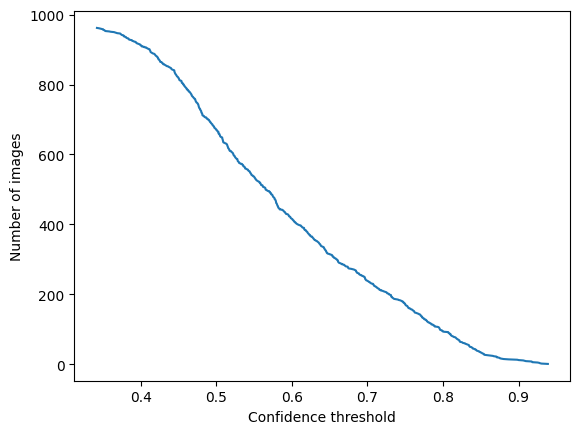

In [11]:
plt.plot(
    labels["artifact"],
    labels["count"]
)
plt.xlabel("Confidence threshold")
plt.ylabel("Number of images")
plt.show();